In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data_train = pd.read_csv("https://raw.githubusercontent.com/akhil12028/Bank-Marketing-data-set-analysis/master/bank-additional-full.csv", na_values =['NA'])
columns = data_train.columns.values[0].split(';')
columns = [column.replace('"', '') for column in columns]
data_train = data_train.values
data_train = [items[0].split(';') for items in data_train]
data_train = pd.DataFrame(data_train,columns = columns)

data_train['job'] = data_train['job'].str.replace('"', '')
data_train['marital'] = data_train['marital'].str.replace('"', '')
data_train['education'] = data_train['education'].str.replace('"', '')
data_train['default'] = data_train['default'].str.replace('"', '')
data_train['housing'] = data_train['housing'].str.replace('"', '')
data_train['loan'] = data_train['loan'].str.replace('"', '')
data_train['contact'] = data_train['contact'].str.replace('"', '')
data_train['month'] = data_train['month'].str.replace('"', '')
data_train['day_of_week'] = data_train['day_of_week'].str.replace('"', '')
data_train['poutcome'] = data_train['poutcome'].str.replace('"', '')
data_train['y'] = data_train['y'].str.replace('"', '')

In [3]:
data_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [5]:
data_test = pd.read_csv("https://raw.githubusercontent.com/akhil12028/Bank-Marketing-data-set-analysis/master/bank-additional.csv", na_values =['NA'])
data_test = data_test.values
data_test = [items[0].split(';') for items in data_test]
data_test = pd.DataFrame(data_test,columns = columns)

data_test['job'] = data_test['job'].str.replace('"', '')
data_test['marital'] = data_test['marital'].str.replace('"', '')
data_test['education'] = data_test['education'].str.replace('"', '')
data_test['default'] = data_test['default'].str.replace('"', '')
data_test['housing'] = data_test['housing'].str.replace('"', '')
data_test['loan'] = data_test['loan'].str.replace('"', '')
data_test['contact'] = data_test['contact'].str.replace('"', '')
data_test['month'] = data_test['month'].str.replace('"', '')
data_test['day_of_week'] = data_test['day_of_week'].str.replace('"', '')
data_test['poutcome'] = data_test['poutcome'].str.replace('"', '')
data_test['y'] = data_test['y'].str.replace('"', '')

In [6]:
data_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.2,-42,4.191,5195.8,no


In [7]:
def categorize(df):
    new_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    new_df['job'] = le.fit_transform(new_df['job'])
    new_df['marital'] = le.fit_transform(new_df['marital'])
    new_df['education'] = le.fit_transform(new_df['education'])
    new_df['default'] = le.fit_transform(new_df['default'])
    new_df['housing'] = le.fit_transform(new_df['housing'])
    new_df['month'] = le.fit_transform(new_df['month'])
    new_df['loan'] = le.fit_transform(new_df['loan'])
    new_df['contact'] = le.fit_transform(new_df['contact'])
    new_df['day_of_week'] = le.fit_transform(new_df['day_of_week'])
    new_df['poutcome'] = le.fit_transform(new_df['poutcome'])
    new_df['y'] = le.fit_transform(new_df['y'])
    return new_df

In [8]:
data = pd.concat([data_train, data_test])
data.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

In [9]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<AxesSubplot:xlabel='count', ylabel='job'>

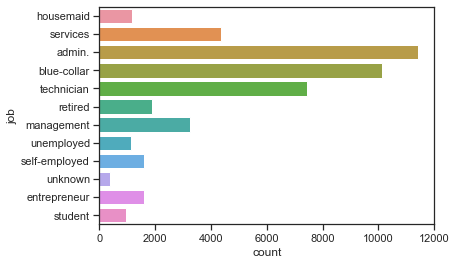

In [11]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job', data=data)

In [12]:
data = data[data.job != 'unknown']

<AxesSubplot:xlabel='count', ylabel='marital'>

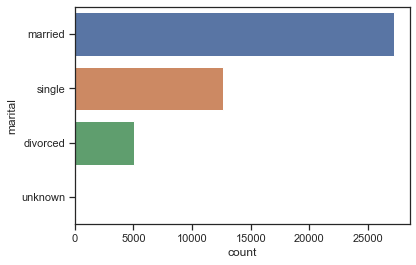

In [13]:
sns.countplot(y='marital', data=data)

In [14]:
data.marital.value_counts()

married     27175
single      12638
divorced     5043
unknown        82
Name: marital, dtype: int64

In [15]:
data = data[data.marital != 'unknown']
data = data[data.loan != 'unknown']

<AxesSubplot:xlabel='count', ylabel='education'>

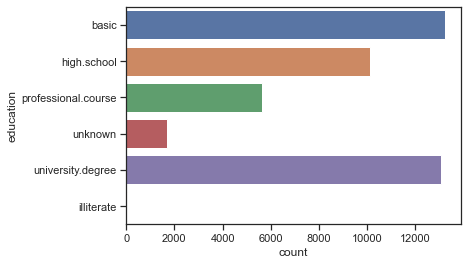

In [16]:
sns.countplot(y='education', data=data)

In [17]:
data = data[data.education != 'illiterate']

In [18]:
data.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,43748,43748,43748,43748,43748,43748,43748,43748,43748,43748,...,43748,43748,43748,43748,43748,43748,43748,43748,43748,43748
unique,78,11,3,5,3,2,2,2,10,5,...,41,27,8,3,10,26,26,316,11,2
top,31,admin.,married,basic,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,1.4,93.994,-36.4,4.857,5228.1,no
freq,2079,11174,26508,13231,34778,23514,36912,27915,14595,9160,...,18731,42139,37748,37748,17239,8157,8157,3027,17239,38828


<AxesSubplot:xlabel='count', ylabel='y'>

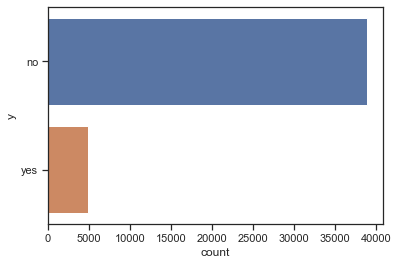

In [19]:
sns.countplot(y='y', data=data)

<AxesSubplot:xlabel='y', ylabel='duration'>

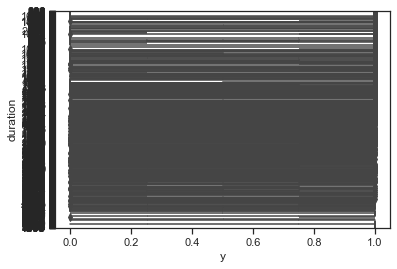

In [21]:
sns.boxplot(x='y', y='duration', data=data)

<AxesSubplot:xlabel='y', ylabel='education'>

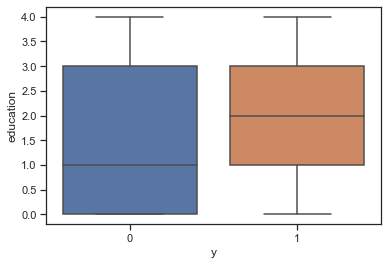

In [22]:
sns.boxplot(x='y', y='education', data=data)

<AxesSubplot:xlabel='y', ylabel='housing'>

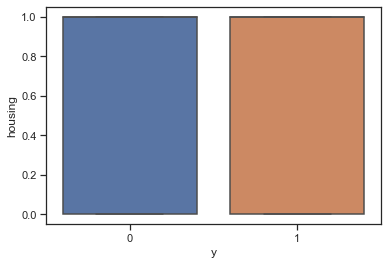

In [23]:
sns.boxplot(x='y', y='housing', data=data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='age'>

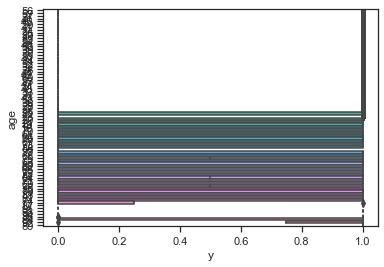

In [24]:
sns.boxplot(data['y'],data['age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='job'>

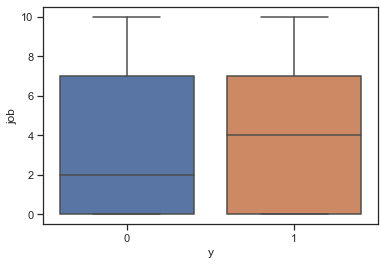

In [25]:
sns.boxplot(data['y'],data['job'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='campaign'>

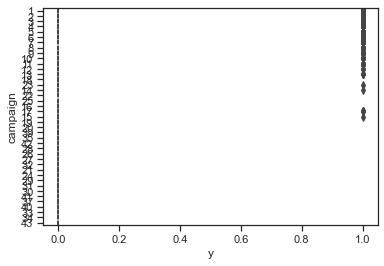

In [26]:
sns.boxplot(data['y'],data['campaign'])

In [27]:
def remove_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [28]:
min_val = data["duration"].min()
max_val = 1500
data = remove_outliers(df=data, column='duration' , minimum=min_val, maximum=max_val)

min_val = data["age"].min()
max_val = 80
data = remove_outliers(df=data, column='age' , minimum=min_val, maximum=max_val)

min_val = data["campaign"].min()
max_val = 6
data = remove_outliers(df=data, column='campaign' , minimum=min_val, maximum=max_val)

TypeError: '>' not supported between instances of 'str' and 'int'

<AxesSubplot:xlabel='education', ylabel='count'>

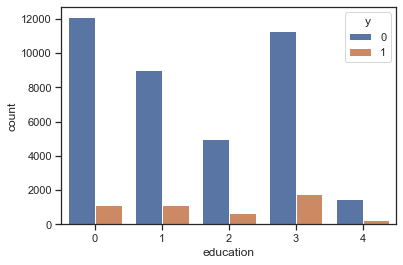

In [29]:
sns.countplot(x='education',hue='y',data=data)

<AxesSubplot:xlabel='default', ylabel='count'>

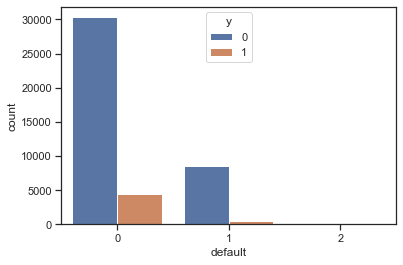

In [30]:
sns.countplot(x='default',hue='y',data=data)

In [31]:
data = data.drop('default',axis=1)

<AxesSubplot:xlabel='poutcome', ylabel='count'>

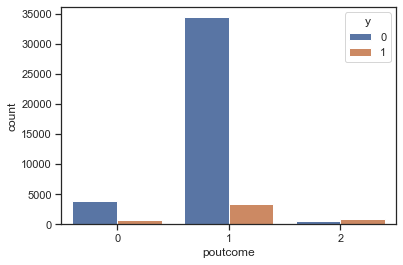

In [32]:
sns.countplot(x='poutcome',hue='y',data=data)

In [33]:
data = data.drop('poutcome',axis=1)

<AxesSubplot:xlabel='loan', ylabel='count'>

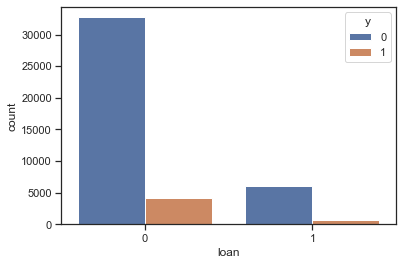

In [34]:
sns.countplot(x='loan',hue='y',data=data)

<AxesSubplot:xlabel='contact', ylabel='count'>

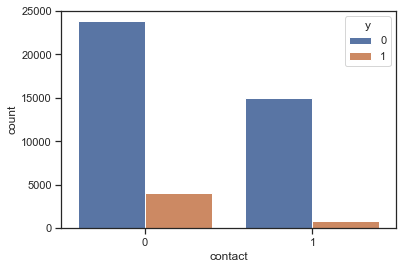

In [35]:
sns.countplot(x='contact',hue='y',data=data)

In [36]:
data = data.drop('contact',axis=1)

In [37]:
data = data.drop(['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'],axis=1)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43748 entries, 0 to 4118
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          43748 non-null  object
 1   job          43748 non-null  int32 
 2   marital      43748 non-null  int32 
 3   education    43748 non-null  int32 
 4   housing      43748 non-null  int32 
 5   loan         43748 non-null  int32 
 6   month        43748 non-null  int32 
 7   day_of_week  43748 non-null  int32 
 8   duration     43748 non-null  object
 9   campaign     43748 non-null  object
 10  pdays        43748 non-null  object
 11  previous     43748 non-null  object
 12  y            43748 non-null  int32 
dtypes: int32(8), object(5)
memory usage: 4.3+ MB


In [39]:
data.head()

,age,job,marital,education,housing,loan,month,day_of_week,duration,campaign,pdays,previous,y
0,56,3,1,0,0,0,6,1,261,1,999,0,0
1,57,7,1,1,0,0,6,1,149,1,999,0,0
2,37,7,1,1,1,0,6,1,226,1,999,0,0
3,40,0,1,0,0,0,6,1,151,1,999,0,0
4,56,7,1,1,0,1,6,1,307,1,999,0,0


In [40]:
X = data.drop('y',axis = 1).values
y = data['y'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [41]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)

In [42]:
pca = PCA(n_components=10)
pca.fit(X_train)
X_train = pca.fit_transform(X_train)

In [43]:
X_train.shape

(32811, 10)

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decison-Tree', DecisionTreeClassifier()))
models.append(('Gaussian', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('ADA', AdaBoostClassifier(n_estimators = 120)))

In [ ]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}".format(name, cv_results.mean())
    print(msg)

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(names,results)

In [ ]:
scaler.fit(X_test)
X_test = scaler.fit_transform(X_test)

In [ ]:
pca.fit(X_test)
X_test = pca.fit_transform(X_test)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))